EVALUACIÓN FINAL: ANÁLISIS DEL IMPACTO DEL CAMBIO CLIMÁTICO EN LA PRODUCCIÓN AGRÍCOLA


Eres un analista de datos en un centro de investigación sobre cambio climático y seguridad alimentaria. Te han encomendado evaluar cómo factores climáticos afectan la producción agrícola en distintos países. Para ello, aplicarás modelos de aprendizaje supervisado para predecir la producción de alimentos y clasificar los países según su vulnerabilidad.
OBJETIVOS DE LA EVALUACIÓN

- Aplicar técnicas de regresión para predecir la producción agrícola en función de variables climáticas.
- Utilizar algoritmos de clasificación para categorizar los países según el impacto del cambio climático.
- Evaluar el desempeño de los modelos mediante métricas adecuadas.
- Aplicar preprocesamiento de datos para mejorar la calidad del análisis.
- Optimizar los modelos a través de técnicas de ajuste de hiperparámetros.

1. Carga y exploración de datos (1 punto)
- Carga el dataset proporcionado, que contiene información sobre temperatura media, cambio en las precipitaciones, frecuencia de sequías y producción agrícola en distintos países.
- Analiza la distribución de las variables y detecta posibles valores atípicos o tendencias.

              País  Temperatura_promedio  Cambio_lluvias  Frecuencia_sequías  \
0         Alemania                  10.5              -5                   2   
1        Argentina                  17.8             -10                   5   
2        Australia                  22.3             -15                   8   
3           Brasil                  25.1              -8                   6   
4           Canadá                   6.2              -2                   1   
5            Chile                  15.4             -12                   7   
6           España                  18.2              -9                   6   
7   Estados Unidos                  12.8              -4                   3   
8          Francia                  11.5              -6                   2   
9           Italia                  13.4              -7                   4   
10           Japón                  16.1              -3                   1   
11          México                  22.9

,Temperatura_promedio,Cambio_lluvias,Frecuencia_sequías,Producción_alimentos
count,23.000000,23.000000,23.000000,2.300000e+01
mean,16.291304,-7.782609,4.347826,7.030435e+05
std,6.692256,4.055933,2.604344,2.410665e+05
min,4.600000,-15.000000,1.000000,3.000000e+05
25%,12.150000,-11.000000,2.000000,5.250000e+05
50%,15.400000,-8.000000,4.000000,7.000000e+05
75%,21.400000,-4.500000,6.500000,8.950000e+05
max,28.000000,-1.000000,9.000000,1.200000e+06



Missing Values:


,0
País,0
Temperatura_promedio,0
Cambio_lluvias,0
Frecuencia_sequías,0
Producción_alimentos,0


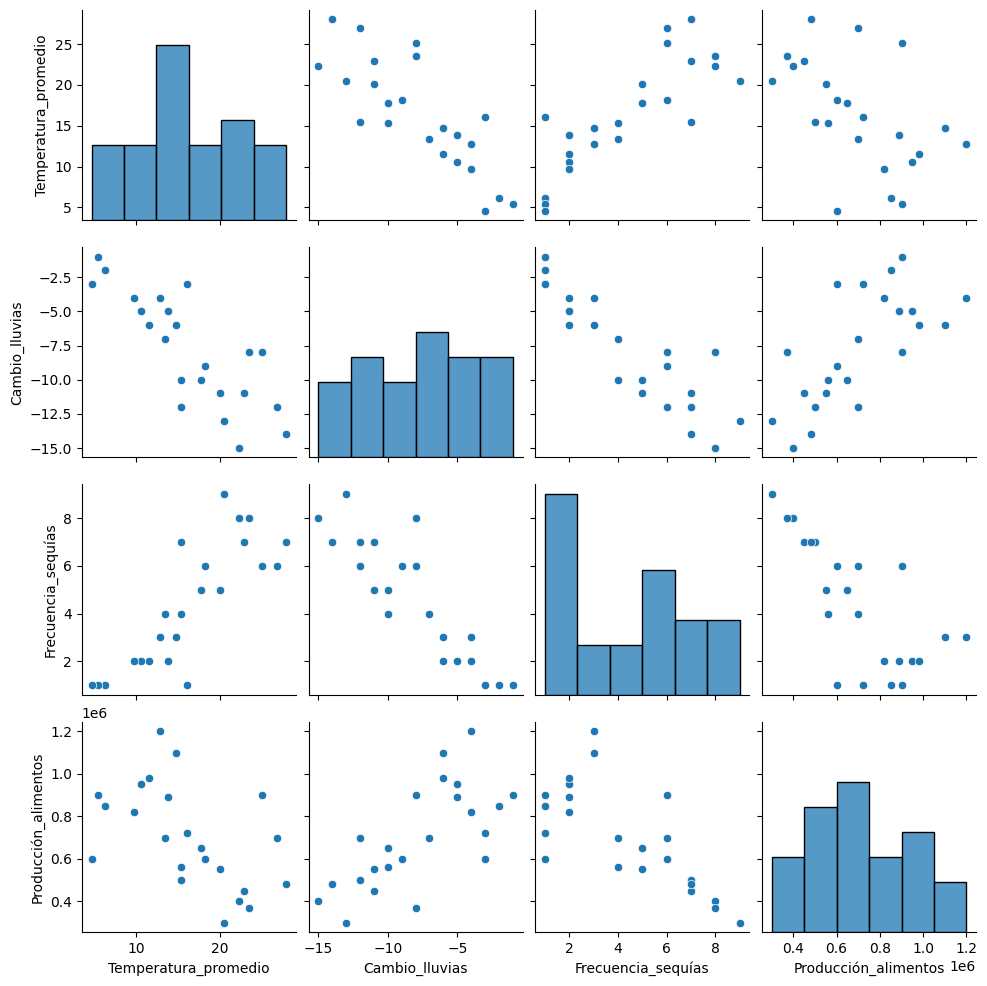

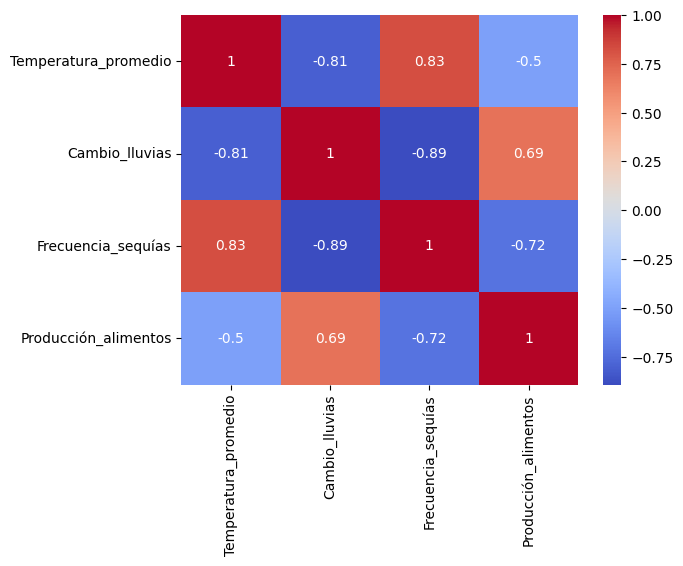

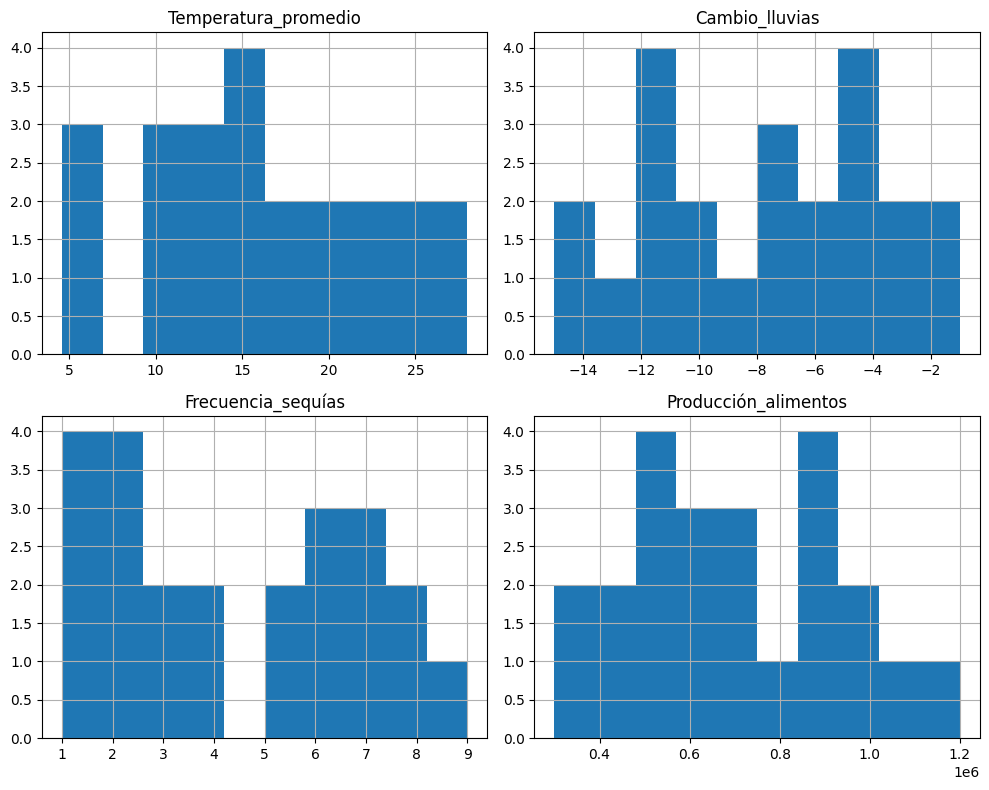

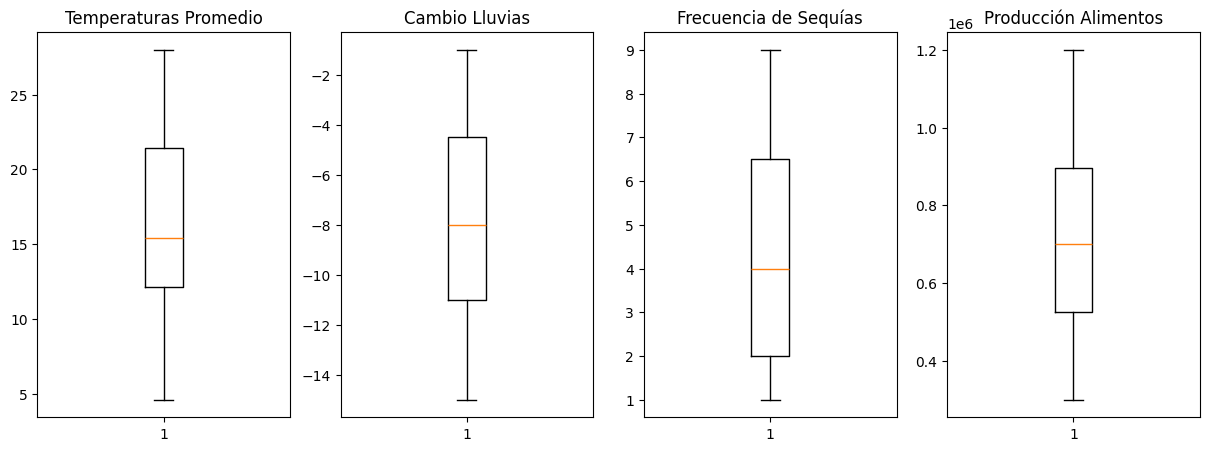

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/sample_data/cambio_climatico_agricultura.csv')
print(df)

print("Descriptive Statistics:")
display(df.describe())

print("\nMissing Values:")
display(df.isnull().sum())

# Calculo de la matrix de correlación
df_num = df.drop('País', axis=1)
correlation_matrix = df_num.corr()

sns.pairplot(df_num)
plt.show()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Distribución de datos
df_num.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Boxplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].boxplot(df_num['Temperatura_promedio'])
axs[0].set_title('Temperaturas Promedio')
axs[1].boxplot(df_num['Cambio_lluvias'])
axs[1].set_title('Cambio Lluvias')
axs[2].boxplot(df_num['Frecuencia_sequías'])
axs[2].set_title('Frecuencia de Sequías')
axs[3].boxplot(df_num['Producción_alimentos'])
axs[3].set_title('Producción Alimentos')
plt.show()

2. Preprocesamiento y escalamiento de datos (2 puntos)
- Aplica técnicas de normalización o estandarización a las variables numéricas.
- Codifica correctamente cualquier variable categórica si fuera necesario.
- Divide los datos en conjunto de entrenamiento y prueba (80%-20%).

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Estandarización datos
scaler = StandardScaler()
df_scaled = df_num.copy()
col_df = ['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías', 'Producción_alimentos']
df_scaled[col_df] = scaler.fit_transform(df_scaled[col_df])
df_scaled.head(5)

# Definición de variables dependientes e independientes
X = df_scaled[['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías']]
y = df_scaled['Producción_alimentos']

# Separación de los datos en 80% y 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Aplicación de modelos de aprendizaje supervisado (4 puntos)
- Regresión:
  - Entrena un modelo de regresión lineal para predecir la producción de alimentos.
  - Evalúa el modelo usando métricas como MAE, MSE y R2.
  - Compara con otros modelos de regresión (árbol de decisión, random forest).

In [3]:
#### Regresión linear ####

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)

metrics_linear = {
    'MAE': mean_absolute_error(y_test, y_pred_linear),
    'MSE': mean_squared_error(y_test, y_pred_linear),
    'R2': r2_score(y_test, y_pred_linear)
}

print("Métricas Regresión Lineal:")
for metric, value in metrics_linear.items():
    print(f"{metric}: {value}")

#### Decision Tree ####

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

y_pred_tree = tree_reg.predict(X_test)

metrics_tree = {
    'MAE': mean_absolute_error(y_test, y_pred_tree),
    'MSE': mean_squared_error(y_test, y_pred_tree),
    'R2': r2_score(y_test, y_pred_tree)
}

print("\nMétricas Árbol de Decisión (Regresión):")
for metric, value in metrics_tree.items():
    print(f"{metric}: {value}")

#### Random Forest ####

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

y_pred_forest = forest_reg.predict(X_test)

metrics_forest = {
    'MAE': mean_absolute_error(y_test, y_pred_forest),
    'MSE': mean_squared_error(y_test, y_pred_forest),
    'R2': r2_score(y_test, y_pred_forest)
}

print("\nMétricas Random Forest (Regresión):")
for metric, value in metrics_forest.items():
    print(f"{metric}: {value}")

Métricas Regresión Lineal:
MAE: 0.7551550625490837
MSE: 0.7861315430050025
R2: -0.26207873382901603

Métricas Árbol de Decisión (Regresión):
MAE: 0.8482927648266465
MSE: 1.202452627426441
R2: -0.9304528650646948

Métricas Random Forest (Regresión):
MAE: 0.6743079187607012
MSE: 0.6149556817841739
R2: 0.012732035582255219


- Clasificación:
  - Crea una nueva variable categórica que clasifique los países en "Bajo", "Medio" y "Alto" impacto climático en la producción agrícola.
  - Entrena modelos de clasificación como K-Nearest Neighbors, Árbol de Decisión y Support Vector Machine.
  - Evalúa el desempeño usando matriz de confusión, precisión, sensibilidad y curva ROC-AUC.

In [24]:
from time import process_time_ns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score


#### Clasificación ####

# Crear la variable categórica 'Impacto_climático'
# Definir los umbrales (puedes ajustarlos según tu análisis exploratorio)
bajo_umbral = df_scaled['Producción_alimentos'].quantile(0.33)
alto_umbral = df_scaled['Producción_alimentos'].quantile(0.66)

def classify_impact(production):
    if production <= bajo_umbral:
        return 'Bajo'
    elif production <= alto_umbral:
        return 'Medio'
    else:
        return 'Alto'

df_scaled['Impacto_climatico'] = df_scaled['Producción_alimentos'].apply(classify_impact)

# Definir variables independientes (X) y dependiente (y) para clasificación
X_clas = df_scaled[['Temperatura_promedio', 'Cambio_lluvias', 'Frecuencia_sequías']]
y_clas = df_scaled['Impacto_climatico']

# Separar los datos en conjunto de entrenamiento y prueba (80%-20%)
X_train_clas, X_test_clas, y_train_clas, y_test_clas = train_test_split(X_clas, y_clas, test_size=0.2, random_state=42, stratify=y_clas)


#### Clasificación con Random Forest ####

# Entrenar el modelo Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_clas, y_train_clas)

# Predecir en el conjunto de prueba
y_pred_rf_clas = rf_clf.predict(X_test_clas)

# Evaluar el modelo
print("\nMétricas Random Forest (Clasificación):")
print("Matriz de Confusión:\n", confusion_matrix(y_test_clas, y_pred_rf_clas))
print("Precisión:", accuracy_score(y_test_clas, y_pred_rf_clas))
print("Sensibilidad (Recall):", recall_score(y_test_clas, y_pred_rf_clas, average='weighted'))

#### Clasificación con Árbol de Decisión ####

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_clas, y_train_clas)

y_pred_dt_clas = dtree.predict(X_test_clas)

print("\nMétricas Árbol de Decisión (Clasificación):")
print("Matriz de Confusión:\n", confusion_matrix(y_test_clas, y_pred_dt_clas))
print("Precisión:", accuracy_score(y_test_clas, y_pred_dt_clas))
print("Sensibilidad (Recall):", recall_score(y_test_clas, y_pred_dt_clas, average='weighted'))
#

#### Clasificación con K-neighbor ####

knn = KNeighborsClassifier()
knn.fit(X_train_clas, y_train_clas)

y_pred_knn_clas = knn.predict(X_test_clas)

print("\nMétricas K-Nearest Neighbors (Clasificación):")
print("Matriz de Confusión:\n", confusion_matrix(y_test_clas, y_pred_knn_clas))
print("Precisión:", accuracy_score(y_test_clas, y_pred_knn_clas))
print("Sensibilidad (Recall):", recall_score(y_test_clas, y_pred_knn_clas, average='weighted'))
#

#### Clasificación con SVM ####

svm = SVC(probability=True, random_state=42)
svm.fit(X_train_clas, y_train_clas)

y_pred_svm_clas = svm.predict(X_test_clas)

print("\nMétricas Support Vector Machine (Clasificación):")
print("Matriz de Confusión:\n", confusion_matrix(y_test_clas, y_pred_svm_clas))
print("Precisión:", accuracy_score(y_test_clas, y_pred_svm_clas))
print("Sensibilidad (Recall):", recall_score(y_test_clas, y_pred_svm_clas, average='weighted'))
#


Métricas Random Forest (Clasificación):
Matriz de Confusión:
 [[2 0 0]
 [0 2 0]
 [1 0 0]]
Precisión: 0.8
Sensibilidad (Recall): 0.8

Métricas Árbol de Decisión (Clasificación):
Matriz de Confusión:
 [[1 0 1]
 [1 1 0]
 [1 0 0]]
Precisión: 0.4
Sensibilidad (Recall): 0.4

Métricas K-Nearest Neighbors (Clasificación):
Matriz de Confusión:
 [[2 0 0]
 [0 2 0]
 [1 0 0]]
Precisión: 0.8
Sensibilidad (Recall): 0.8

Métricas Support Vector Machine (Clasificación):
Matriz de Confusión:
 [[2 0 0]
 [0 2 0]
 [1 0 0]]
Precisión: 0.8
Sensibilidad (Recall): 0.8


4. Optimización de modelos (2 puntos)
- Ajusta hiperparámetros utilizando validación cruzada y búsqueda en grilla.
- Aplica técnicas de regularización y analiza su impacto en los modelos.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Definir el espacio de hiperparámetros a explorar para Random Forest Classifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30], # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10], # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]    # Número mínimo de muestras requeridas para ser una hoja
}

# Crear el objeto GridSearchCV
# cv=5 indica 5-fold cross-validation
# scoring='accuracy' es una métrica adecuada para clasificación
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1) # Usa todos los núcleos disponibles

# Ajustar GridSearchCV a los datos de entrenamiento
print("Iniciando búsqueda en grilla para Random Forest Classifier...")
grid_search_rf.fit(X_train_clas, y_train_clas)

# Mostrar los mejores hiperparámetros encontrados y el mejor score
print("\nMejores hiperparámetros para Random Forest Classifier:")
print(grid_search_rf.best_params_)
print("\nMejor score de validación cruzada (Accuracy):")
print(grid_search_rf.best_score_)

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_rf_clf = grid_search_rf.best_estimator_
y_pred_best_rf_clas = best_rf_clf.predict(X_test_clas)

print("\nMétricas del mejor Random Forest Classifier en el conjunto de prueba:")
print("Matriz de Confusión:\n", confusion_matrix(y_test_clas, y_pred_best_rf_clas))
print("Precisión:", accuracy_score(y_test_clas, y_pred_best_rf_clas))
print("Sensibilidad (Recall):", recall_score(y_test_clas, y_pred_best_rf_clas, average='weighted'))

Iniciando búsqueda en grilla para Random Forest Classifier...

Mejores hiperparámetros para Random Forest Classifier:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}

Mejor score de validación cruzada (Accuracy):
0.6166666666666666

Métricas del mejor Random Forest Classifier en el conjunto de prueba:
Matriz de Confusión:
 [[2 0 0]
 [0 2 0]
 [1 0 0]]
Precisión: 0.8
Sensibilidad (Recall): 0.8


5. Análisis de resultados y conclusiones (1 punto)
- Compara los modelos utilizados y justifica cuál ofrece mejores resultados para la predicción y clasificación.
- Relaciona los hallazgos con posibles implicaciones en la seguridad alimentaria global.

**Respuesta**

Según los datos objetidos de los modelos realizados, en lo que fue predicción de modelos, los resultados no fueron muy ajustados a los datos mostrando bajo r-cuadrado, o resultados negativos.
Por otro lado, las clasifiaciones si resultaron con buen ajuste de hasta 0,8 en presición y sensibilidad para Knn, SVM y árboles de desición. Para Random forest, los resultados con la mejora de parámetros no aumentó demasiado.

A continuación se observa la clasifación de países en las distintas categorías según el análisis, resultando una repartición equitativa:

Países por Categoría de Impacto Climático:
- Bajo: Australia, Chile, México, Sudáfrica, Perú, Tailandia, Egipto, Nueva Zelanda
- Medio: Argentina, España, Italia, Japón, Reino Unido, India, Noruega
- Alto: Alemania, Brasil, Canadá, Estados Unidos, Francia, Rusia, China, Corea del Sur

De manera que estos 8 países de la categoría "Alta" están más expuestos a variaciones actuales del clima y a sus efectos sobre la produccividad alimentaria.

/tmp/ipython-input-2227355663.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=impacto_counts.index, y=impacto_counts.values, palette='viridis')


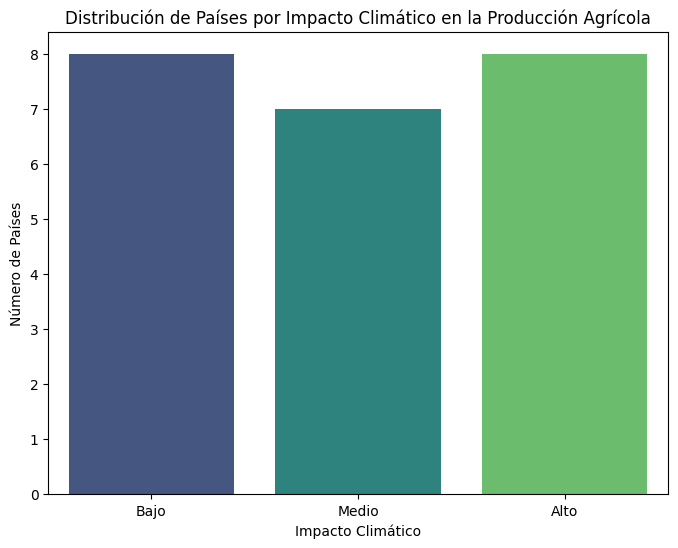


Países por Categoría de Impacto Climático:
- Bajo: Australia, Chile, México, Sudáfrica, Perú, Tailandia, Egipto, Nueva Zelanda
- Medio: Argentina, España, Italia, Japón, Reino Unido, India, Noruega
- Alto: Alemania, Brasil, Canadá, Estados Unidos, Francia, Rusia, China, Corea del Sur


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de países en cada categoría de impacto climático
impacto_counts = df_scaled['Impacto_climatico'].value_counts()

# Definir un orden para las categorías
category_order = ['Bajo', 'Medio', 'Alto']
impacto_counts = impacto_counts.reindex(category_order)

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=impacto_counts.index, y=impacto_counts.values, palette='viridis')
plt.title('Distribución de Países por Impacto Climático en la Producción Agrícola')
plt.xlabel('Impacto Climático')
plt.ylabel('Número de Países')
plt.show()

# Mostrar los países en cada categoría
print("\nPaíses por Categoría de Impacto Climático:")
for category in category_order:
    countries_in_category = df[df_scaled['Impacto_climatico'] == category]['País'].tolist()
    print(f"- {category}: {', '.join(countries_in_category)}")